# Pioneer MAB Profiler Example
Written by Sage Lichtenwalner, Rutgers University, June 2, 2024
Revised November 4, 2024

In this notebook, we will briefly demonstrate how to access and plot **profiler** data from the new **Ocean Observatories Initiative** (OOI) **Pioneer Mid Atlantic Bight** (MAB) Array.  The array was deployed in April 2024 off the coast of North Carolina, a bit north of Cape Hatteras. While there are a number of ways to access data from the OOI, we will use the relatively new OOI ERDDAP data server, which provides a straightforward way to request and download data.  

This example will highlight how to plot a profile timeseries of CTD and Fluorometry (chlorophyll) data.  We will also show how to subset a few profiles so they can be plotted individually.

**At the end of this notebook activity, you will be able to:**
* Understand how to use the *erddapy* library to easily load data from the OOI ERDDAP data server into a programming environment
* Generate profile timeseries plots of of temperature, salinity and chlorophyll data
* Sub-select a specific time period to pull out specific profiles
* Generate profile plots of the same variables.

In [1]:
# Install erddapy if needed (required if running on Google Colab)
# !pip install erddapy

In [2]:
# Notebook Setup
from erddapy import ERDDAP
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Setup a connection to the OOI Erddap server
server = "https://erddap.dataexplorer.oceanobservatories.org/erddap/"
e = ERDDAP(
    server=server,
    protocol="tabledap",
    response="csv",
)

In [4]:
# Setup an Errdap request to grab two months of profiler data
url_profiler = e.get_download_url(
    dataset_id = "ooi-cp14sepm-wfp01-04-flortk000",
    constraints = {
      "time>=": "2024-05-01",
      "time<=": "2024-06-01",
    }
)
# print(url_profiler)

# Load the profiler data
df = pd.read_csv(url_profiler, index_col='time', parse_dates=True, skiprows=[1])

# Display the first 5 rows
df.head()

,latitude,longitude,z,cdomflo_profiler_depth_enabled,mass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled,flubsct_profiler_depth_enabled,sea_water_practical_salinity_profiler_depth_enabled,sea_water_pressure_profiler_depth_enabled,sea_water_temperature_profiler_depth_enabled,station
time,,,,,,,,,,
2024-05-01 00:02:00+00:00,35.8552,-74.8509,-105.0,4.15426,0.00000,0.003164,34.594128,105.39,13.3632,NaN
2024-05-01 00:02:00+00:00,35.8552,-74.8509,-104.0,3.88333,0.02430,0.002527,34.584270,104.36,13.3450,NaN
2024-05-01 00:02:00+00:00,35.8552,-74.8509,-103.0,4.06395,0.00000,0.003581,34.591278,103.39,13.3710,NaN
2024-05-01 00:03:00+00:00,35.8552,-74.8509,-118.0,4.06395,-0.01215,0.002549,34.759940,118.57,13.6795,NaN
2024-05-01 00:03:00+00:00,35.8552,-74.8509,-116.0,4.06395,0.01215,0.002681,34.754983,117.29,13.6810,NaN


In [5]:
# Quick list of variabless
df.dtypes

latitude                                                                   float64
longitude                                                                  float64
z                                                                          float64
cdomflo_profiler_depth_enabled                                             float64
mass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled    float64
flubsct_profiler_depth_enabled                                             float64
sea_water_practical_salinity_profiler_depth_enabled                        float64
sea_water_pressure_profiler_depth_enabled                                  float64
sea_water_temperature_profiler_depth_enabled                               float64
station                                                                    float64
dtype: object

## Plotting a Profile Timeseries
Now that we've loaded the data, let's make a quick plot of the temperature profiles.  

To do this, we're going to create a scatter plot, which will just plot all the data as dots (by default) on top of each other.  We can adjust the size of the dots using the `s=5` parameter.  

We will also specify a colormap for the data using the `cmap` parameter.  Matplotlib has a lot of [built-in colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) you can use.  

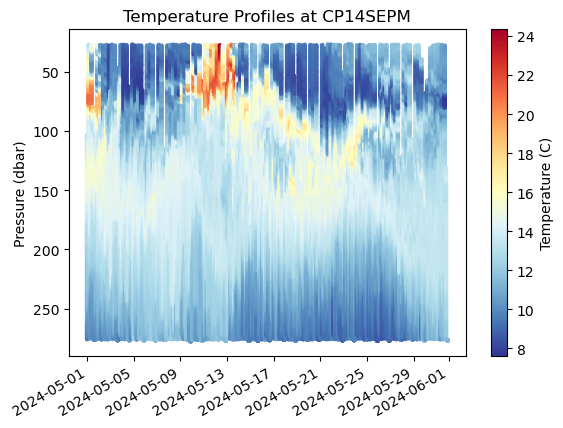

In [6]:
fig, ax = plt.subplots()
plt.scatter(df.index, df.sea_water_pressure_profiler_depth_enabled, c=df.sea_water_temperature_profiler_depth_enabled, s=5, cmap='RdYlBu_r')
plt.colorbar(label='Temperature (C)')

# # Flip the y-axis
plt.gca().invert_yaxis()

# We need to rotate the ticks
fig.autofmt_xdate()

ax.set_ylabel('Pressure (dbar)')
ax.set_title('Temperature Profiles at CP14SEPM');

Next, let's make a more advanced figure that includes temperature, salinity and chlorophyll.

We will also import the [cmocean](https://matplotlib.org/cmocean/) colormap library, which adds several additional colormaps specifically designed for oceanography.

Note, you can also use the `vmin` and `vmax` parameters in the scatter plot function to manually set the color limits.  If you have outliers, you may find it useful to specify max and/or minimum limits.  See the [scatter documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter) for more.  But for now, we will leave these out so the scatter plot automatically uses the full range of the data for the colors.

In [7]:
# !pip install cmocean
import cmocean

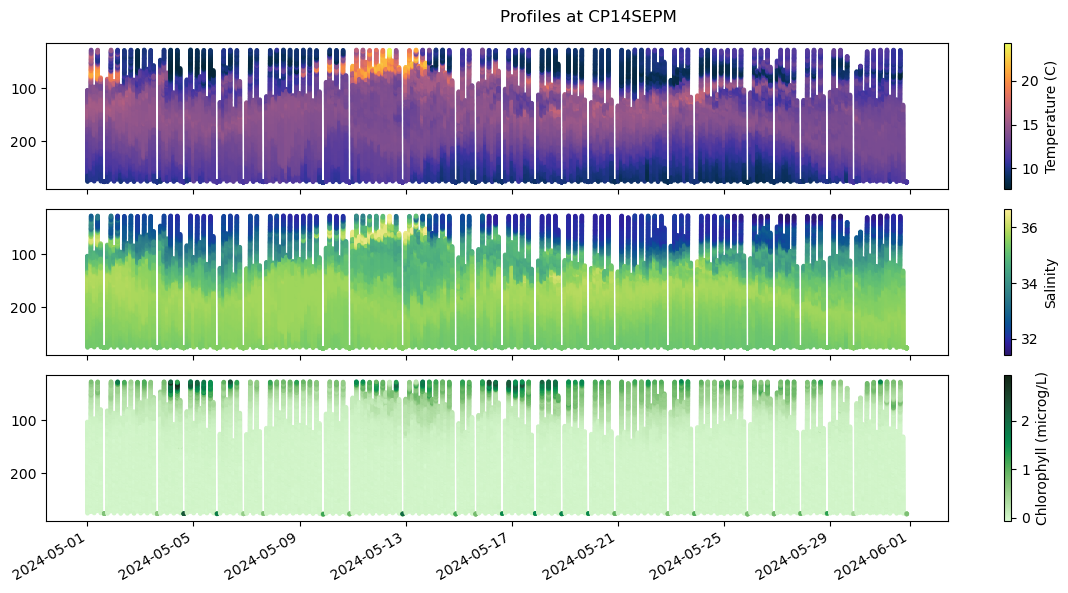

In [8]:
# Setup a figure with 3 supbplots, one for each variable.
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(12,6))

sc1 = ax1.scatter(df.index, df.sea_water_pressure_profiler_depth_enabled, c=df.sea_water_temperature_profiler_depth_enabled, s=5, cmap=cmocean.cm.thermal)
plt.colorbar(sc1, label='Temperature (C)')

sc2 = ax2.scatter(df.index, df.sea_water_pressure_profiler_depth_enabled, c=df.sea_water_practical_salinity_profiler_depth_enabled, s=5, cmap=cmocean.cm.haline)
plt.colorbar(sc2, label='Salinity')

sc3 = ax3.scatter(df.index, df.sea_water_pressure_profiler_depth_enabled, c=df.mass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled, s=5, cmap=cmocean.cm.algae)
plt.colorbar(sc3, label='Chlorophyll (microg/L)')

# # Flip the y-axis
plt.gca().invert_yaxis()

# We need to rotate the ticks
fig.autofmt_xdate()

fig.suptitle('Profiles at CP14SEPM');
fig.tight_layout();

## Subsetting profiles
Plotting a bunch of profiles in a timeseries is fun, but what if we only want to plot a few or one profile?

A quick way is to pull out a specific time period for the profile(s) you wish to plot.  As an simple example, let's pull out all of the profiles on May 5th. There are actually a [few ways](https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates) we can do this, like everything in python, but we'll take the approach that perhaps easiest to understand.

In [9]:
# Filter the timeseries to just May 5th, 2024
df_sub = df[(df.index>'2024-05-05') & (df.index<'2024-05-06')]

# As it turns out, the Pioneer Profilers generally take one profile per hour at the top of the hour.
# So we can also select a single profile from the same day by specifying a time search and adding an hour.
df_sub2 = df[(df.index>'2024-05-05 03') & (df.index<'2024-05-05 04')]

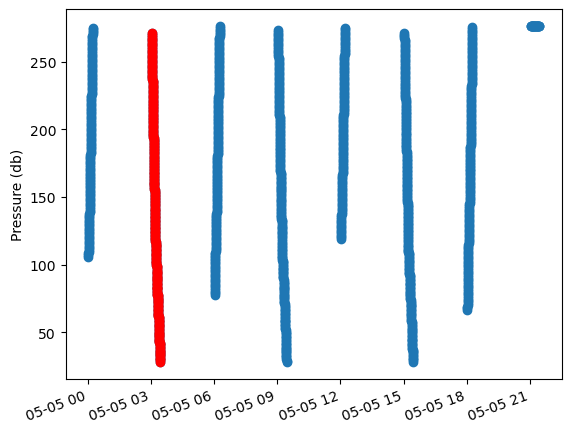

In [10]:
# Plot a timeseries of pressure over one day
plt.scatter(df_sub.index, df_sub.sea_water_pressure_profiler_depth_enabled)

# Overlay the single profile from one hour and make it red
plt.scatter(df_sub2.index, df_sub2.sea_water_pressure_profiler_depth_enabled, color='red')

plt.xticks(rotation=20, horizontalalignment='right')
plt.ylabel('Pressure (db)');

## Plotting a vertical profile

Next, let's plot the same three variables from May 5th as vertical profiles, with the single profile also plotted in red.  With this graph, we can see how a single profile compares with others collected on the same day, and how the 3 profiles of temperature, salinity and chlorophyll compare with each other.

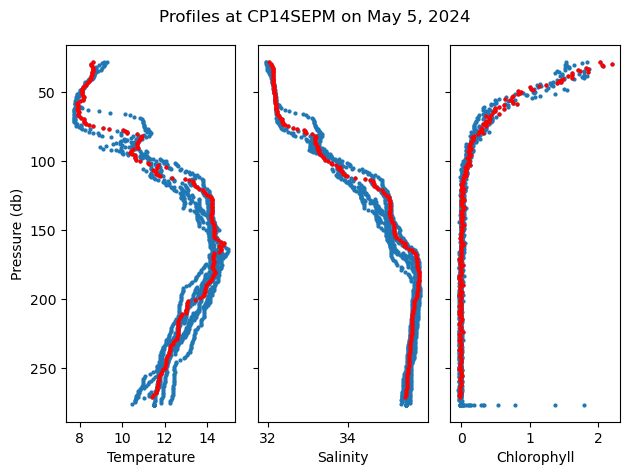

In [11]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)

# Plot all profiles from the day
ax1.scatter(df_sub.sea_water_temperature_profiler_depth_enabled, df_sub.sea_water_pressure_profiler_depth_enabled, s=4)
ax2.scatter(df_sub.sea_water_practical_salinity_profiler_depth_enabled, df_sub.sea_water_pressure_profiler_depth_enabled, s=4)
ax3.scatter(df_sub.mass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled, df_sub.sea_water_pressure_profiler_depth_enabled, s=4)

# Plot the 2nd profile in red
ax1.scatter(df_sub2.sea_water_temperature_profiler_depth_enabled, df_sub2.sea_water_pressure_profiler_depth_enabled, s=4, c='red')
ax2.scatter(df_sub2.sea_water_practical_salinity_profiler_depth_enabled, df_sub2.sea_water_pressure_profiler_depth_enabled, s=4, c='red')
ax3.scatter(df_sub2.mass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled, df_sub2.sea_water_pressure_profiler_depth_enabled, s=4, c='red')

plt.gca().invert_yaxis()

ax1.set_ylabel('Pressure (db)')
ax1.set_xlabel('Temperature')
ax2.set_xlabel('Salinity')
ax3.set_xlabel('Chlorophyll')
fig.suptitle('Profiles at CP14SEPM on May 5, 2024')
fig.tight_layout()

## Going further with a TS Diagram
For fun, let's make a TS (temperature & salinity) diagram for the profile we pulled out.  We will map the color to the pressure (depth), so you can easily see which TS values were taken at the surface, bottom and throughout the water column.

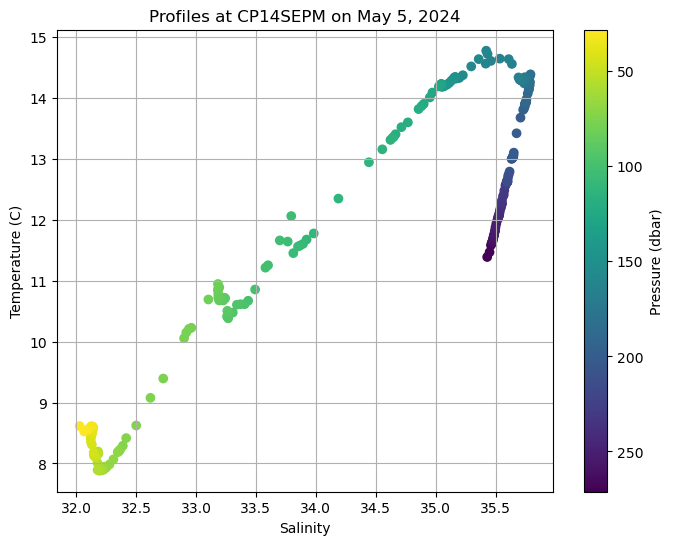

In [12]:
# T-S Diagram with depth
plt.figure(figsize=(8,6))
plt.scatter(df_sub2.sea_water_practical_salinity_profiler_depth_enabled, df_sub2.sea_water_temperature_profiler_depth_enabled, 
            c=df_sub2.sea_water_pressure_profiler_depth_enabled, cmap='viridis_r')

cbh = plt.colorbar(label='Pressure (dbar)');
cbh.ax.invert_yaxis()

plt.xlabel('Salinity')
plt.ylabel('Temperature (C)')

plt.title('Profiles at CP14SEPM on May 5, 2024');
plt.grid()


Finally, let's add the lines of constant density to show how the varying temperature and salinity impact density together.  To do this, we will need to install the `seawater` library to calculate density from temperature and salinity.

In [13]:
# If needed, be sure to install the seawater package first
# !pip install seawater

import seawater # This should probably be updated to the newer GSW library in the future
import numpy as np

/var/folders/mz/ql7rs9ks275g1s0ptc3k3vhh0000gn/T/ipykernel_63183/4250599152.py:4: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater # This should probably be updated to the newer GSW library in the future


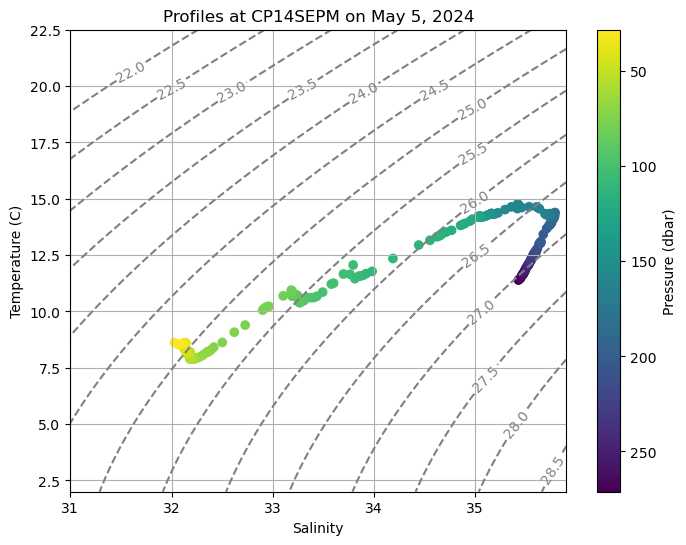

In [14]:
# TS Diagram with density contours
plt.figure(figsize=(8,6))

# Calculate the density lines
x = np.arange(31, 36, .1)
y = np.arange(2, 23, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.5))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

# Plot the data
plt.scatter(df_sub2.sea_water_practical_salinity_profiler_depth_enabled, df_sub2.sea_water_temperature_profiler_depth_enabled, 
            c=df_sub2.sea_water_pressure_profiler_depth_enabled, cmap='viridis_r')
plt.xlabel('Salinity')
plt.ylabel('Temperature (C)')
plt.title('Profiles at CP14SEPM on May 5, 2024');
plt.grid()

# Add a colorbar
cbh = plt.colorbar(label='Pressure (dbar)');
cbh.ax.invert_yaxis()

## Questions for Students
Now that we've created some neat graphs of profiles form the Pioneer Array, here are some example questions to help guide students through the data being visualized.

### Vertical Profiles

**Orientation Questions**

1. What is the range (max and min) for each of the variables?
2. At what depth does the max and min value for each profile occur?  (For example, at the surface, near the bottom, or somewhere else?)
3. Are there any noticeable thermoclines (sharp temperature gradients), haloclines (sharp salinity gradients), or sharp gradients in the Chlorophyll?  If so, where are they in the water column?
 
**Interpretation Questions**

4. How does the temperature change from the surface to the bottom of the water column?  Salinity?  Chlorophyll?
5. Based on your understanding of density in a "typical" ocean profile, where in the water column would you have expected the warmest temperatures?  The coldest?
6. Where would you have expected the saltiest waters?  The freshest?
7. How do those expectations compare with what you see in these profiles?

### TS Diagram

**Orientation Questions**

1. What are the temperature, salinity and density values for the shallowest water?  The deepest?

**Interpretation Questions**

2. How do temperature and salinity values cluster in the TS diagram?
3. How does the location (depth) of the min/max temperature and salinity compare with those found at the shallowest and deepest locations?
4. How do the lines of constant density help you understand the relationship between temperature, salinity, and density?
